In [9]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

In [10]:
import tensorflow as tf
import os
from matplotlib import pyplot as plt

In [11]:
gpus = tf.config.experimental.list_physical_devices("GPU")
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu, True)

In [12]:
import cv2
import imghdr

In [13]:
data_dir = 'data'

In [14]:
os.listdir(data_dir)

['happy', 'sad']

In [15]:
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

In [16]:
for image_class in os.listdir(data_dir):
  for image in os.listdir(os.path.join(data_dir, image_class)):
    image_path = os.path.join(data_dir, image_class, image)
    try:
      img = cv2.imread(image_path)
      tip = imghdr.what(image_path)
      if tip not in image_exts:
        print("Image not in ext list {}".format(image_path))
        os.remove(image_path)
    except Exception as e:
      print("Issue with image {}".format(image_path))

In [17]:
tf.data.Dataset??

In [18]:
import numpy as np
from matplotlib import pyplot as plt

In [19]:
data = tf.keras.utils.image_dataset_from_directory("data")

Found 256 files belonging to 2 classes.


In [20]:
#Get another batch from the iterator
data_iterator = data.as_numpy_iterator()

In [21]:
batch = data_iterator.next()

In [22]:
#images represented as numpy arrays
batch[0].shape

(32, 256, 256, 3)

In [23]:
#Class 1: Sad people, Class 0: Happy people. Batch[0] is image, Batch[1] is Label
batch[1]

array([0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0])

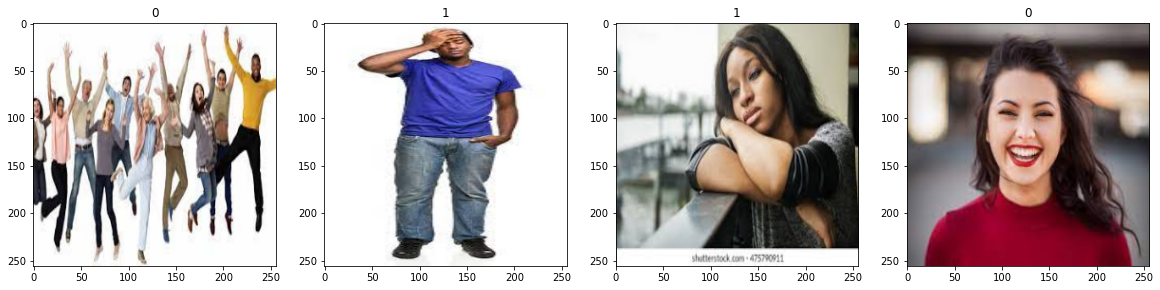

In [24]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

In [25]:
scaled = batch[0] / 255

In [26]:
#Preprocessing Data

In [27]:
data = data.map(lambda image, label: (image / 255, label))

In [28]:
scaled_iterator = data.as_numpy_iterator()

In [29]:
batch = scaled_iterator.next()

In [30]:
batch[0].max()

1.0

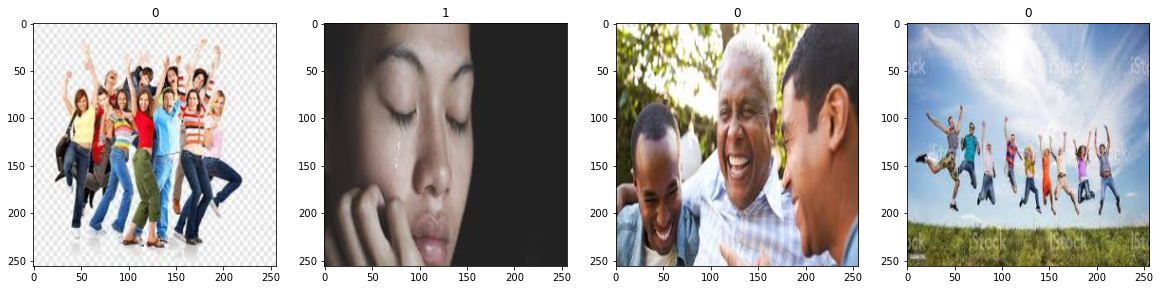

In [31]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img)
  ax[idx].title.set_text(batch[1][idx])

In [32]:
#Split Data

In [33]:
train_size = int(len(data)* 0.7)
val_size = int(len(data)* 0.2) + 1
test_size = int(len(data)* 0.1) + 1

In [34]:
len(data)

8

In [35]:
train_size, val_size, test_size

(5, 2, 1)

In [36]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

In [37]:
#Deep Model

In [38]:
from tensorflow import keras

In [39]:
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.models import Sequential

In [40]:
model = Sequential()

In [41]:
model.add(Conv2D(16, (3, 3), 1, activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3, 3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3, 3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [42]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [43]:
tf.optimizers??

In [44]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [45]:
#Train

In [46]:
logdir = "logs"

In [47]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [48]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
5/5 [==============================] - 3s 553ms/step - loss: 1.2032 - accuracy: 0.5562 - val_loss: 0.7766 - val_accuracy: 0.3906
Epoch 2/20
5/5 [==============================] - 2s 489ms/step - loss: 0.7195 - accuracy: 0.4437 - val_loss: 0.6873 - val_accuracy: 0.7812
Epoch 3/20
5/5 [==============================] - 3s 518ms/step - loss: 0.6522 - accuracy: 0.7312 - val_loss: 0.5562 - val_accuracy: 0.6875
Epoch 4/20
5/5 [==============================] - 3s 737ms/step - loss: 0.5413 - accuracy: 0.7312 - val_loss: 0.5134 - val_accuracy: 0.6875
Epoch 5/20
5/5 [==============================] - 3s 716ms/step - loss: 0.4720 - accuracy: 0.7688 - val_loss: 0.3243 - val_accuracy: 0.8594
Epoch 6/20
5/5 [==============================] - 3s 667ms/step - loss: 0.4353 - accuracy: 0.8000 - val_loss: 0.4373 - val_accuracy: 0.8281
Epoch 7/20
5/5 [==============================] - 3s 594ms/step - loss: 0.3351 - accuracy: 0.8687 - val_loss: 0.3053 - val_accuracy: 0.8438
Epoch 8/20
5/5 [====

In [49]:
hist.history

{'loss': [1.2032248973846436,
  0.7195340991020203,
  0.6521905660629272,
  0.5413388013839722,
  0.4720301032066345,
  0.4353474974632263,
  0.3350644111633301,
  0.24967387318611145,
  0.2705133855342865,
  0.21499161422252655,
  0.15645332634449005,
  0.12981024384498596,
  0.08132824301719666,
  0.06253626942634583,
  0.05715743452310562,
  0.023940060287714005,
  0.02549394592642784,
  0.02323927916586399,
  0.02488131821155548,
  0.024275939911603928],
 'accuracy': [0.5562499761581421,
  0.4437499940395355,
  0.731249988079071,
  0.731249988079071,
  0.768750011920929,
  0.800000011920929,
  0.8687499761581421,
  0.8812500238418579,
  0.893750011920929,
  0.8999999761581421,
  0.96875,
  0.956250011920929,
  0.96875,
  0.9750000238418579,
  0.987500011920929,
  1.0,
  1.0,
  0.9937499761581421,
  1.0,
  0.987500011920929],
 'val_loss': [0.7765597105026245,
  0.6873106956481934,
  0.5562305450439453,
  0.513383150100708,
  0.3243405818939209,
  0.43725886940956116,
  0.30533096194

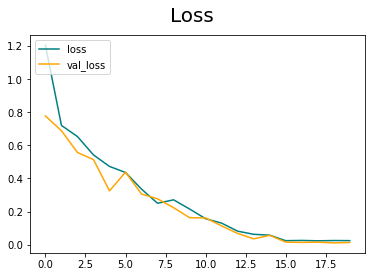

In [50]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
plt.legend(loc="upper left")
plt.suptitle("Loss", fontsize=20)
plt.show()

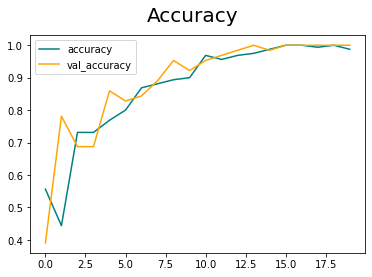

In [51]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
plt.legend(loc="upper left")
plt.suptitle("Accuracy", fontsize=20)
plt.show()

In [52]:
#Evaluate

In [53]:
from keras.metrics import Precision, Recall, BinaryAccuracy
precision = Precision()
recall = Recall()
accuracy = BinaryAccuracy()

In [54]:
for batch in test.as_numpy_iterator():
  Images, label = batch
  label_hat = model.predict(Images)
  precision.update_state(label, label_hat)
  recall.update_state(label, label_hat)
  accuracy.update_state(label, label_hat)

1/1 [==============================] - 0s 143ms/step


In [55]:
print(f"Precision: {precision.result().numpy()}, Recall: {recall.result().numpy()}, Accuracy: {accuracy.result().numpy()}")

Precision: 1.0, Recall: 1.0, Accuracy: 1.0


In [56]:
#Test

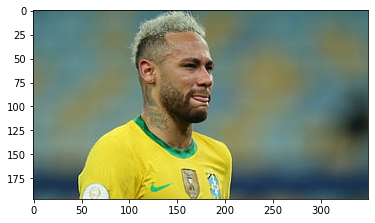

In [57]:
img = cv2.imread('sad.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
#plt.imshow(img)
plt.show()

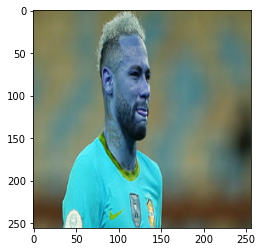

In [58]:
resize = tf.image.resize(img, (256, 256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [59]:
np.expand_dims(resize, 0)

array([[[[117.      , 105.      ,  63.      ],
         [117.      , 105.      ,  63.      ],
         [117.      , 105.      ,  63.      ],
         ...,
         [115.      , 112.      ,  68.      ],
         [115.44922 , 112.44922 ,  68.44922 ],
         [116.      , 113.      ,  69.      ]],

        [[117.      , 105.      ,  63.      ],
         [117.      , 105.      ,  63.      ],
         [117.      , 105.      ,  63.      ],
         ...,
         [115.05367 , 112.05367 ,  68.05367 ],
         [115.80959 , 112.80959 ,  68.80959 ],
         [116.53417 , 113.53417 ,  69.53417 ]],

        [[117.84766 , 105.84766 ,  63.847656],
         [117.84766 , 105.84766 ,  63.847656],
         [117.84766 , 105.84766 ,  63.847656],
         ...,
         [115.47109 , 112.47109 ,  68.47109 ],
         [116.19039 , 113.19039 ,  69.19039 ],
         [116.89422 , 113.89422 ,  69.89422 ]],

        ...,

        [[100.3825  ,  82.3825  ,  53.3825  ],
         [101.2793  ,  83.2793  ,  54.279297]

In [60]:
yhat = model.predict(np.expand_dims(resize/255, 0)) #Require batch of images, not just one

1/1 [==============================] - 0s 60ms/step


In [61]:
yhat

array([[0.01965725]], dtype=float32)

In [62]:
if yhat > 0.5:
  print("Predicted class is Sad")
else:
  print("Predicted class is Happy")

Predicted class is Happy


In [63]:
#Save Model
from keras.models import load_model
model.save(os.path.join('models', 'happysadmodel.h5'))

In [64]:
new_model = load_model(os.path.join('models', 'happysadmodel.h5'))

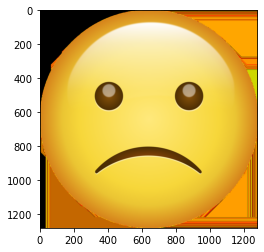

In [65]:
import cv2
from matplotlib import pyplot as plt
img_test = cv2.imread("test.jpg")
plt.imshow(cv2.cvtColor(img_test, cv2.COLOR_BGR2RGB))
plt.show()

In [66]:
yhat2 = new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 64ms/step


In [67]:
yhat2

array([[0.01965725]], dtype=float32)